In [1]:
# Imports
import matplotlib.pyplot   as plt
import numpy               as np
import openseespy.opensees as ops
import pprint
import vfo.vfo             as vfo
import sys
import os

from datetime import  datetime
from polars   import (Int8, 
                      Float32, 
                      Float64, 
                      Boolean)

from generation.generator import (StructuralDatasetGenerator,
                                          PlanarTrussGenerator,
                                          LinearCantileverTrussGenerator,
                                          LinearTwoBarTruss)
from generation.analysis  import LinearAnalysis
from visualization                import ops_plot

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(linewidth=sys.maxsize)
np.set_printoptions(formatter={'float_kind':
                                   lambda x:
                                   f"{x:.2e}".rjust(11, ' ') if abs(x) > 1e-4
                                   else "0.".rjust(11, ' ') if x == 0 else "~0.".rjust(11, ' ')})

Initial units
Length  m
Load    N
Area    m^2 
Young   N/m^2
K       N/m




In [2]:
structure_df = LinearCantileverTrussGenerator({
    'parameters': {
        'cell_number': {
            'default': {'type': 'CONSTANT', 'parameters': (2,)}
        },
        'cell_length': { # m 
            'default': {'type': 'CONSTANT', 'parameters': (9,)}
        },
        'cell_height': { # m 
            'default': {'type': 'DISTRIBUTION', 'parameters': ('length',)}
        },
        'supports': {
            '0-x': {'type': 'CONSTANT', 'parameters': (1,)},
            '0-y': {'type': 'CONSTANT', 'parameters': (1,)},
            '1-x': {'type': 'CONSTANT', 'parameters': (1,)},
            '1-y': {'type': 'CONSTANT', 'parameters': (1,)},
        },
        'areas': {
            'default': {'type': 'UNIFORM_CONST', 'parameters': (1.e-4, 1.e-1)}  # m 
        },
        'youngs': {
            'default': {'type': 'UNIFORM_CONST', 'parameters': (50.e9, 100.e9)} # Pa
        },
        'loads': { 
            '3-y': {'type': 'DISTRIBUTION', 'parameters': ('load',)},           # N
            '5-y': {'type': 'DISTRIBUTION', 'parameters': ('load',)},
        }
    },
    'distributions': {
        'length': {'type': 'UNIFORM', 'parameters': (4., 10.)},
        'load': {'type': 'UNIFORM', 'parameters': (-1000.e3, -10.e3)},
    }
}
)

In [3]:
structure_df.save(size=100_000)

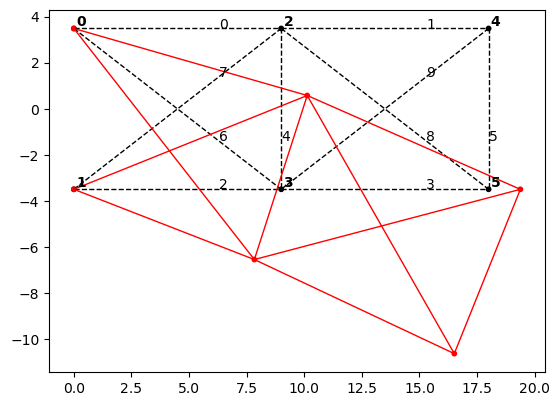

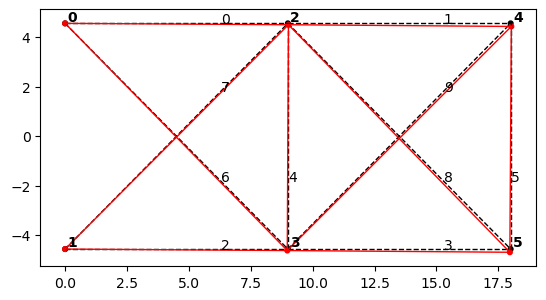

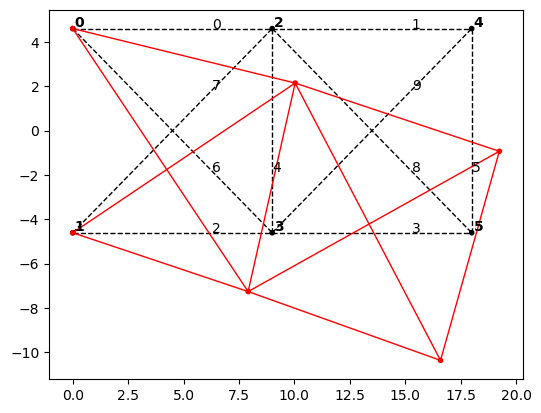

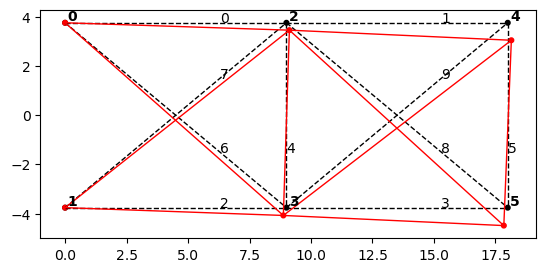

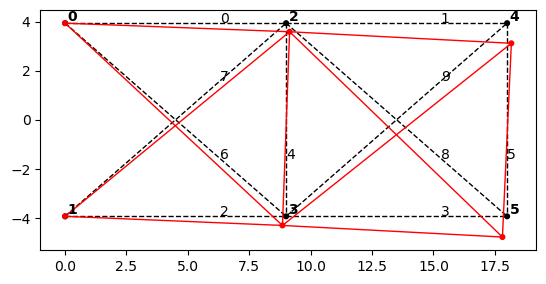

In [4]:
for i in structure_df.__iter__(5):
    ops_plot.plot()